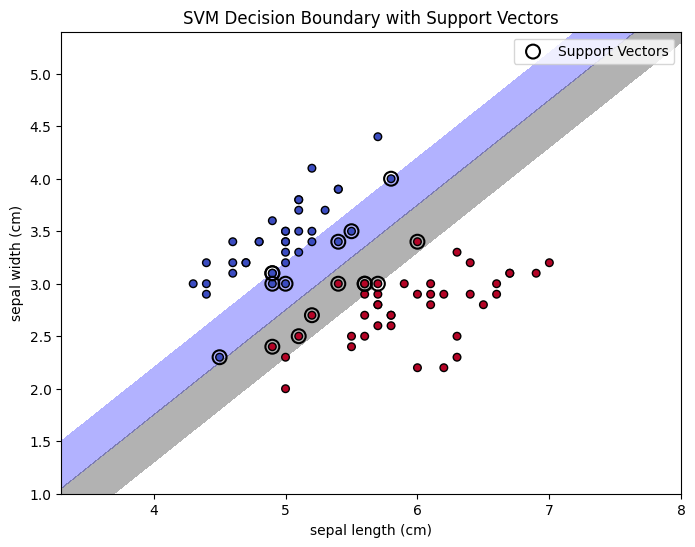

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset (using the Iris dataset and selecting only 2 features for 2D visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only first two features for simplicity
y = iris.target

# For binary classification, select only 2 classes (Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Function to plot the decision boundary, margins, and support vectors
def plot_svm_decision_boundary(model, X, y):
    # Create a mesh grid for plotting the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the decision function for each point in the mesh grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot the decision boundary (where Z = 0), and the margin (Z = -1 and Z = 1)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, linestyles=['--', '-', '--'], colors=['blue', 'black', 'blue'])

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Plot the support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # Plot labels and title
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Decision Boundary with Support Vectors")
    plt.legend(loc='best')
    plt.show()

# Plot the decision boundary, support vectors, and margins
plot_svm_decision_boundary(svm, X_train, y_train)
